### Welcome back!
In this analysis, we will analyze the e-commerce sample super store dataset available on kaggle.com to provide valuable insights for informed business decisions.

This project intends to provide insights into the following business questions based on the problem statement.
- What is the overall trend in sales over time?
- How do sales vary across different customer segments?
- How are sales distributed geographically (by country, city, region)?
- What are the sales trends for different product categories?
- Which sub-categories contribute the most to overall sales?
- How do shipping modes affect delivery times and customer satisfaction?
- What is the impact of discounts on sales and profit margins?
- Which products or categories are the most profitable?
- Are there any seasonal trends or patterns in sales?
- Are there any trends or patterns in customer feedback or complaints?

#### Importing the libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Loading the dataset
path = 'Sample_Superstore.csv'
store = pd.read_csv(path)
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Data Preprocessing Tasks

In [4]:
# check for null values
store.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
store.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# check number of rows and columns
store.shape
print('They are %.0f rows and %.0f columns'%(store.shape[0], store.shape[1]))

They are 9994 rows and 21 columns


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Insights:
- The dataset have 9994 records or rows and 21 columns
- Over all Mean sale is approximately 230 with an average of 4 product quantities per sale and an average of 28.66 profit 
    per sale
- There is high variability in the prices and sales of items for a single transaction indicated by high std dev.
- Min sale per transaction is 0.44 while max amount of sale per transaction is 22638.48
- Max profit overall stands at 8399.98 with 1.73 representing 25% of the total sales.

#### Data modelling phase

#### 1.	What is the overall trend in sales over time?

In [13]:
# convert order date column to pandas dataframe
import datetime as datetime

In [14]:
store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Ship Date'] = pd.to_datetime(store['Ship Date'])

In [15]:
# # Trend in sales
# def plot_trend(store, x, y, title='', xlabel='Order Date', ylabel='Sales over time', dpi=100):
#     plt.figure(figsize=(10, 5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_trend(store, x=store['Order Date'], y=store['Sales'], title='Time series plot of Sales over Years')

In [16]:
# df = store.groupby('Order Date')['Sales'].count()

# window = 10

# ma_avg = df.rolling(10)

#### 2. How do sales vary across different customer segments?

In [17]:
#customer segmentation
seg = store.groupby('Segment').Sales.sum().sort_values(ascending=False)
seg.head(20)

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Distribution of Sales by Customer Segmentation')

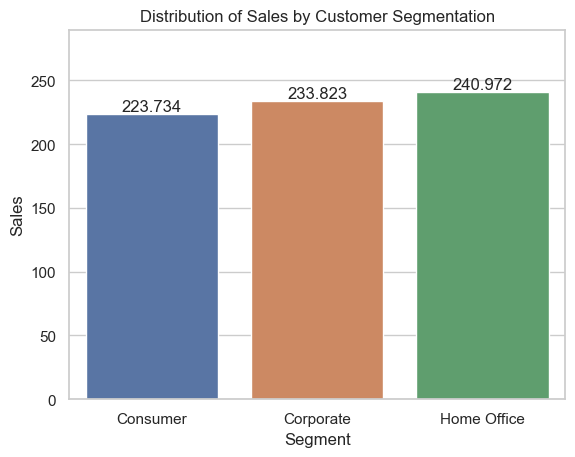

In [18]:
ax = sns.barplot(data=store, x='Segment', y='Sales', errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Sales by Customer Segmentation')

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

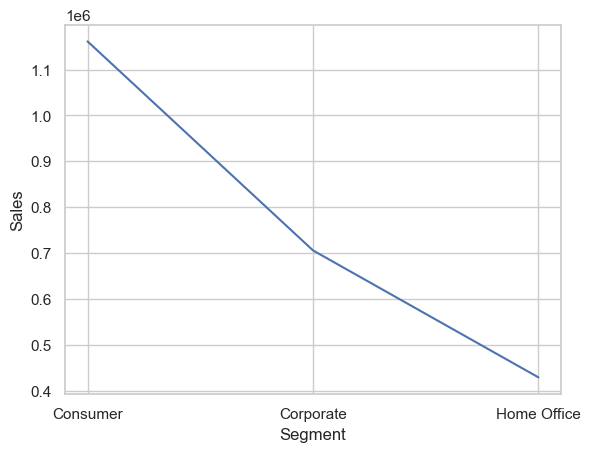

In [19]:
sns.lineplot(data=seg)

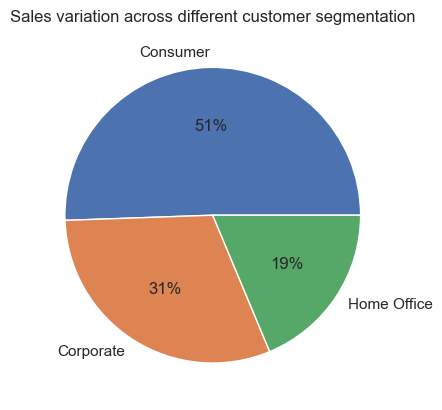

In [20]:
data = [1.161401e+06, 7.061464e+05, 4.296531e+05]
segment = ['Consumer', 'Corporate', 'Home Office']
plt.pie(data, labels=segment, autopct='%.0f%%')
plt.title('Sales variation across different customer segmentation')
plt.show()

#### Insights:
- The distribution of sales by customer segmetation shows that Consumer customers have contributed half of the total sales 
    over the years accounting for 51%, while Coprorate customers contribute to the variability of total sales by 31% and 
    Home customers account for only 19% of the total sales respectively.

#### 3. How are sales distributed geographically (by country, city, region)

In [54]:
# dist of sales by states
state_sales = store.groupby('State').Sales.sum().sort_values(ascending=False).head(20)
state_sales

State
California        457687.6315
New York          310876.2710
Texas             170188.0458
Washington        138641.2700
Pennsylvania      116511.9140
Florida            89473.7080
Illinois           80166.1010
Ohio               78258.1360
Michigan           76269.6140
Virginia           70636.7200
North Carolina     55603.1640
Indiana            53555.3600
Georgia            49095.8400
Kentucky           36591.7500
New Jersey         35764.3120
Arizona            35282.0010
Wisconsin          32114.6100
Colorado           32108.1180
Tennessee          30661.8730
Minnesota          29863.1500
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Distribution of Sales by State')

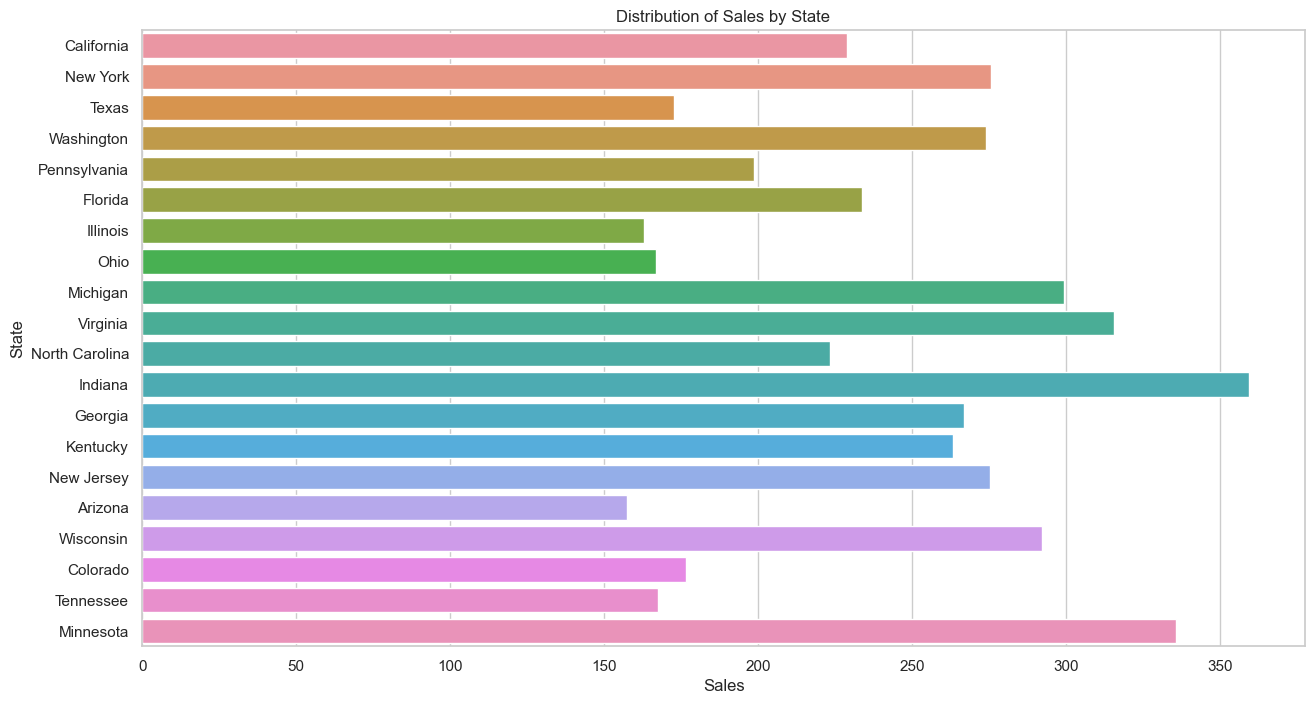

In [55]:
plt.figure(figsize=(15, 8))
sns.barplot(data=store, x='Sales', y='State', order=state_sales.index, ci=None)
plt.title('Distribution of Sales by State')

In [56]:
# by city
city_sales = store.groupby('City').Sales.sum().sort_values(ascending=False).head(20)
city_sales

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Distribution of Sales by City')

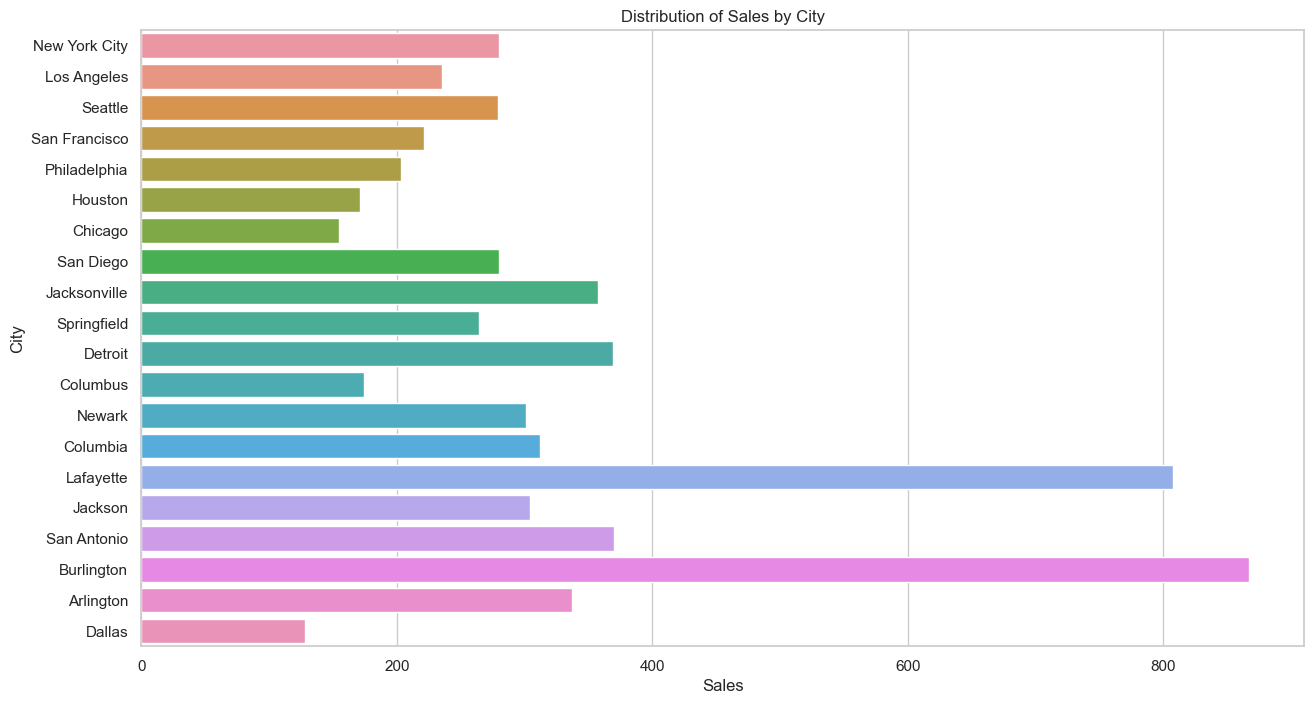

In [57]:
plt.figure(figsize=(15, 8))
sns.barplot(data=store, x='Sales', y='City', order=city_sales.index, ci=None)
plt.title('Distribution of Sales by City')

In [58]:
reg_sales = store.groupby('Region').Sales.sum().sort_values(ascending=False).head(20)
reg_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Distribution of Sales by Region')

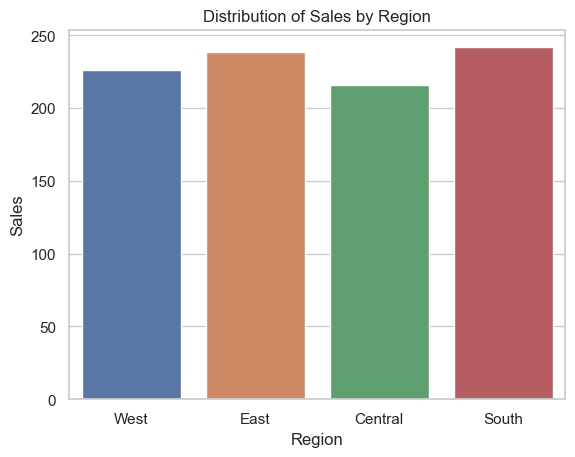

In [59]:
sns.barplot(data=store, x='Region', y='Sales', order=reg_sales.index, ci=None)
plt.title('Distribution of Sales by Region')

- The geographic analysis shows how sales are distributed across various States in the U.S
- The distribution by State shows the top 20 states with high sales volume over the period with Indiana topping the 
    chart followed by Minnesota.
- The distribution of sales by city also shows top 20 most performing cities.
    - Burlington is ranked as the top city by sales followed by Lafayette
- The distribution by region identify the Sourthern region as the top performing region by sales, followed by East, West, 
    nd the Central regions respectively.

#### 4. What are the sales trends for different product categories?

In [60]:
# product category analysis
cat_sales = store.groupby('Category').Sales.sum().sort_values(ascending=False)
cat_sales

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

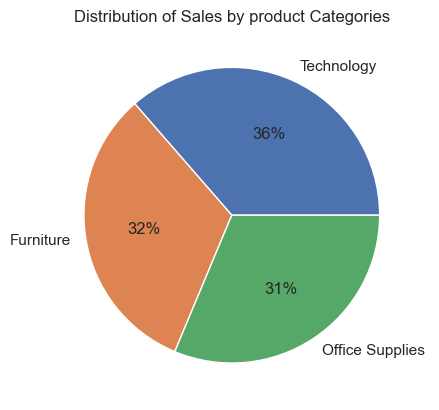

In [61]:
sales_cat = [836154.0330, 741999.7953, 719047.0320]
category = ['Technology', 'Furniture', 'Office Supplies ']
plt.pie(sales_cat, labels=category, autopct='%.0f%%')
plt.title('Distribution of Sales by product Categories')
plt.show()

- The distribution of Sales across different product categories shows that Technology accounts for 36% of the total sales
- Furniture category has account for 32% of the total sales over the period
- Office Supplies on the other hand contributed to 31% of the sales

#### 5. Which sub-categories contribute the most to overall sales?

In [62]:
# product sub-category analysis
top5_sub_cat = store.groupby('Sub-Category').Sales.sum().sort_values(ascending=False).head(5)
top5_sub_cat

Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top5 Performing Product Sub-Categories to Overall sales')

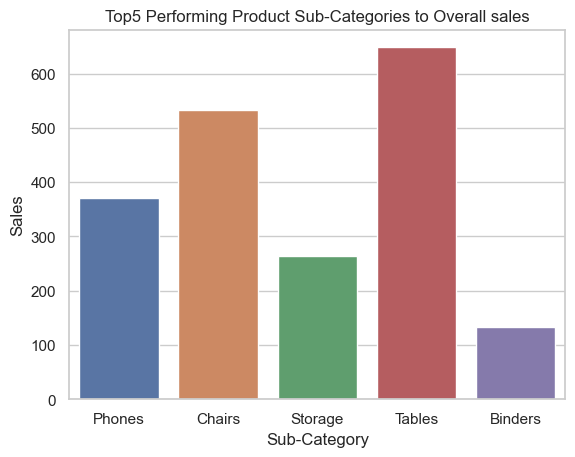

In [63]:
sns.barplot(data=store, x='Sub-Category', y='Sales', order=top5_sub_cat.index, ci=None)
plt.title('Top5 Performing Product Sub-Categories to Overall sales')

Text(0.5, 1.0, 'Top 5 Performing Product Sub-Categories to Overall Sales')

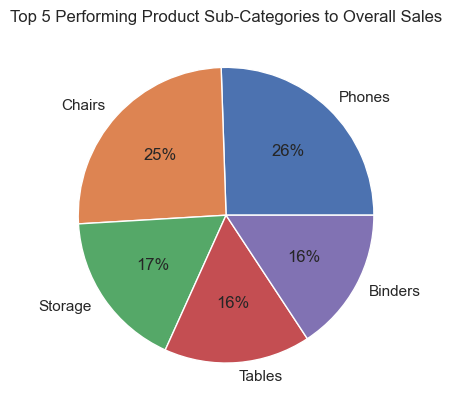

In [64]:
sub_cat = [330007.054, 328449.103, 223843.608, 206965.532, 203412.733]
keys = ['Phones', 'Chairs', 'Storage', 'Tables', 'Binders']
plt.pie(sub_cat, labels=keys, autopct='%.0f%%')
plt.title('Top 5 Performing Product Sub-Categories to Overall Sales')

- The top 5 product sub-categories contributing to the overall sales shows that;
- Tables have the highest sales volume, followed by Chairs sub-category with , Phones, Storage, and Binders respectively
- The Pie chart distribution shows that;
    - Phones account for 26% of the overall sales
    - Chairs contributes 25% of the total sales
    - Storage account for 17%
    - Tables and Binders both explained 16% each of the overall sales
- The differences in the two graphs must be investigated to see the cause of such variations

#### 6. How do shipping modes affect delivery times and customer satisfaction?

In [72]:
#shipping analysis
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [73]:
mode = store.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
mode

Ship Mode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64

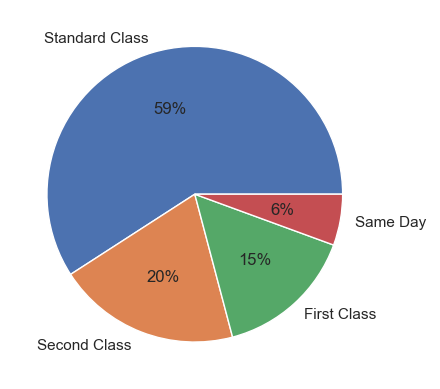

In [38]:
ship_data = [1.358216e+06, 4.591936e+05,  3.514284e+05,  1.283631e+05]
keys = ['Standard Class', 'Second Class ', 'First Class', 'Same Day ']
plt.pie(ship_data, labels=keys, autopct='%.0f%%')
plt.show()

- The four different ship modes have positive effect on the delivery times and customer satisfaction as shown in the bar plot
- Standard Class ship mode accounts for 59% of the delivery time and customer satisfaction. This imply they control the 
    market and are determinant factor for driving high sales and deliveries
- Second Class ship mode accountfor 20%
- First Class ship mode account for 15% 
- Same Day ship mode only contribute 6%

#### 7. What is the impact of discounts on sales and profit margins?

In [74]:
discount = store[['Discount', 'Sales', 'Profit']]
discount.head(10)

,Discount,Sales,Profit
0,0.00,261.9600,41.9136
1,0.00,731.9400,219.5820
2,0.00,14.6200,6.8714
3,0.45,957.5775,-383.0310
4,0.20,22.3680,2.5164
5,0.00,48.8600,14.1694
6,0.00,7.2800,1.9656
7,0.20,907.1520,90.7152
8,0.20,18.5040,5.7825
9,0.00,114.9000,34.4700


In [75]:
correl = discount.corr()
correl

,Discount,Sales,Profit
Discount,1.000000,-0.028190,-0.219487
Sales,-0.028190,1.000000,0.479064
Profit,-0.219487,0.479064,1.000000


- The correlation matrix was used to assess the impact of discounts on sales and profit margin.
- There is a negative relationship between discounts and sales as well as discounts and profit
- Higher discounts is associated with lower sales and lower profit margins
- Lower discounts is associated with higher sales and higher profit margins

#### 8. Which products or categories are the most profitable?

In [76]:
#profitability analysis
categ = store.groupby('Category').Profit.sum().sort_values(ascending=False).head(10)
categ

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Profit'>

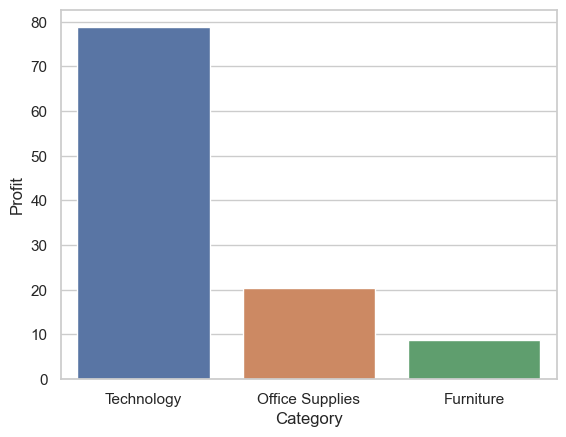

In [77]:
sns.barplot(data=store, x='Category', y='Profit', order=categ.index, ci=None)

- Technology is the most profitable category overall
- Technology is 4x more profitable than Office Supplies and 6x more profitable than Furniture